# Ensemble Methods on Term Deposit Bank Data

### Brandon Novak

### April 23rd, 2021

## Import and Prepare Data

In [2]:
import pandas as pd
bank_data = pd.read_csv("bank-additional-full.csv", sep = ";")
bank_data = bank_data.drop("duration", axis = 1)

import numpy as np
labels = bank_data['y'].map(dict(yes=1, no=0))
labels = np.array(labels)

features = bank_data.drop('y', axis = 1)
features = pd.get_dummies(features)
features = np.array(features)

from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3)
print("Size of training data: " + str(len(train_features)))
print("Size of test data: " + str(len(test_features)))
len(bank_data.columns)
bank_data.columns

Size of training data: 28831
Size of test data: 12357


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Implement Decision Tree

In [3]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(max_depth = 5)
tree_model = tree_model.fit(train_features,train_labels)
predictions = tree_model.predict(test_features)
accuracy_count = 0
for i in range(len(predictions)):
    if predictions[i] == test_labels[i]:
        accuracy_count += 1
accuracy_tree = accuracy_count/len(predictions)
print("Gini Accuracy = " + str(accuracy_tree))

tree_model = tree.DecisionTreeClassifier(max_depth = 5, criterion = "entropy")
tree_model = tree_model.fit(train_features,train_labels)
predictions = tree_model.predict(test_features)
accuracy_count = 0
for i in range(len(predictions)):
    if predictions[i] == test_labels[i]:
        accuracy_count += 1
accuracy_tree = accuracy_count/len(predictions)
print("Entropy Accuracy = " + str(accuracy_tree))

Gini Accuracy = 0.9033746054867686
Entropy Accuracy = 0.9031318281136198


## Implement Random Forest

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def RandomTree_byCriterion(criteria):
    accuracy = []
    iterations= []
    for n_trees in range(10, 150,10):
        iterations.append(n_trees)
        rf_model = RandomForestClassifier(n_estimators = n_trees, criterion = criteria, max_depth = 5)
        rf_model.fit(train_features, train_labels)
        predictions = rf_model.predict(test_features)
        accuracy_count = 0
        for i in range(len(predictions)):
            if predictions[i] == test_labels[i]:
                accuracy_count += 1
        accuracy.append(accuracy_count / len(test_labels))
    return accuracy, iterations

accuracy_gini, num_of_trees = RandomTree_byCriterion("gini")
accuracy_entropy, num_of_trees = RandomTree_byCriterion("entropy")

In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.plot(num_of_trees, accuracy_gini, label = "RF gini")
plt.plot(num_of_trees, accuracy_entropy, label = "RF entropy")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
accuracy_gini = np.round(accuracy_gini, 5)
accuracy_entropy = np.round(accuracy_entropy, 5)
accuracy_table = pd.DataFrame({"Number of Trees":num_of_trees, "RF Accuracy w/ gini":accuracy_gini, "RF Accuracy w/ entropy": accuracy_entropy})
accuracy_table = accuracy_table.set_index("Number of Trees")
accuracy_table.style.highlight_max(color = 'yellow', axis = 0)

,RF Accuracy w/ gini,RF Accuracy w/ entropy
Number of Trees,,
10,0.9007,0.9007
20,0.90103,0.90054
30,0.90151,0.90087
40,0.90054,0.9007
50,0.90127,0.90054
60,0.90127,0.90103
70,0.90111,0.90135
80,0.90143,0.90151
90,0.90111,0.90135


## Implement Bagging Method

In [7]:
from sklearn.ensemble import BaggingClassifier

def Bagging():
    accuracy = []
    iterations= []
    for n_trees in range(10, 150,10):
        iterations.append(n_trees)
        bag_model = BaggingClassifier(n_estimators=n_trees)
        bag_model.fit(train_features, train_labels)
        predictions = bag_model.predict(test_features)
        accuracy_count = 0
        for i in range(len(predictions)):
            if predictions[i] == test_labels[i]:
                accuracy_count += 1
        accuracy.append(accuracy_count / len(test_labels))
    return accuracy, iterations

Bagging_accuracy, num_of_trees = Bagging()

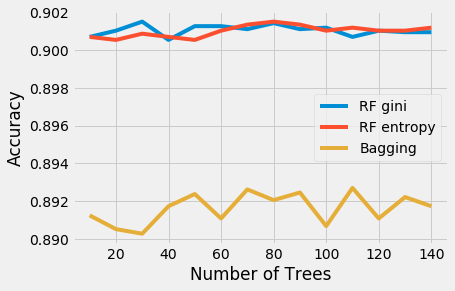

In [8]:
plt.style.use('fivethirtyeight')

plt.plot(num_of_trees, accuracy_gini, label = "RF gini")
plt.plot(num_of_trees, accuracy_entropy, label = "RF entropy")
plt.plot(num_of_trees, Bagging_accuracy, label = "Bagging")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [9]:
Bagging_accuracy = np.round(Bagging_accuracy, 5)
accuracy_table = pd.DataFrame({"Number of Trees":num_of_trees, " RF Accuracy w/ gini":accuracy_gini, " RF Accuracy w/ entropy": accuracy_entropy,
                              "Bagging Accuracy": Bagging_accuracy})
accuracy_table = accuracy_table.set_index("Number of Trees")
accuracy_table.style.highlight_max(color = 'yellow', axis = 0)

,RF Accuracy w/ gini,RF Accuracy w/ entropy,Bagging Accuracy
Number of Trees,,,
10,0.9007,0.9007,0.89124
20,0.90103,0.90054,0.89051
30,0.90151,0.90087,0.89026
40,0.90054,0.9007,0.89172
50,0.90127,0.90054,0.89237
60,0.90127,0.90103,0.89107
70,0.90111,0.90135,0.89261
80,0.90143,0.90151,0.89204
90,0.90111,0.90135,0.89245


## Implement Boosting Method

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

def Boosting():
    accuracy = []
    iterations= []
    for n_trees in range(10, 150,10):
        iterations.append(n_trees)
        Gradient_boost_model = GradientBoostingClassifier(n_estimators = n_trees)
        Gradient_boost_model.fit(train_features, train_labels)
        predictions = Gradient_boost_model.predict(test_features)
        accuracy_count = 0
        for i in range(len(predictions)):
            if predictions[i] == test_labels[i]:
                accuracy_count += 1
        accuracy.append(accuracy_count / len(test_labels))
    return accuracy, iterations

Boosting_accuracy, num_of_trees = Boosting()

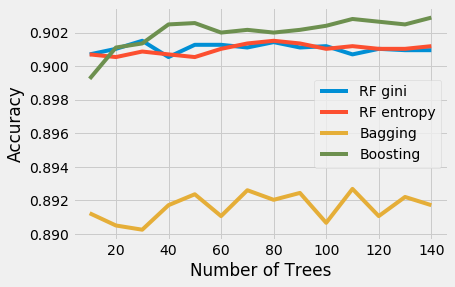

In [11]:
plt.style.use('fivethirtyeight')

plt.plot(num_of_trees, accuracy_gini, label = "RF gini")
plt.plot(num_of_trees, accuracy_entropy, label = "RF entropy")
plt.plot(num_of_trees, Bagging_accuracy, label = "Bagging")
plt.plot(num_of_trees, Boosting_accuracy, label = "Boosting")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
Boosting_accuracy = np.round(Boosting_accuracy, 5)
accuracy_table = pd.DataFrame({"Number of Trees":num_of_trees, "RF Accuracy w/ gini":accuracy_gini, "RF Accuracy w/ entropy": accuracy_entropy,
                              "Bagging Accuracy": Bagging_accuracy, "Boosting Accuracy": Boosting_accuracy})
accuracy_table = accuracy_table.set_index("Number of Trees")
accuracy_table.style.highlight_max(color = 'yellow', axis = 0)

,RF Accuracy w/ gini,RF Accuracy w/ entropy,Bagging Accuracy,Boosting Accuracy
Number of Trees,,,,
10,0.9007,0.9007,0.89124,0.89925
20,0.90103,0.90054,0.89051,0.90111
30,0.90151,0.90087,0.89026,0.90135
40,0.90054,0.9007,0.89172,0.90248
50,0.90127,0.90054,0.89237,0.90257
60,0.90127,0.90103,0.89107,0.902
70,0.90111,0.90135,0.89261,0.90216
80,0.90143,0.90151,0.89204,0.902
90,0.90111,0.90135,0.89245,0.90216


### Scaled Graph of Accuracies

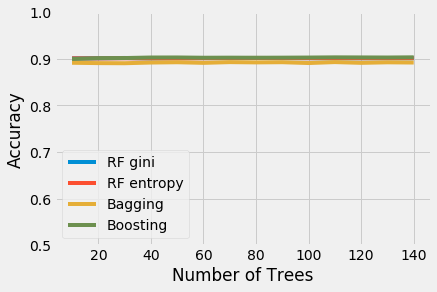

In [13]:
plt.style.use('fivethirtyeight')

plt.plot(num_of_trees, accuracy_gini, label = "RF gini")
plt.plot(num_of_trees, accuracy_entropy, label = "RF entropy")
plt.plot(num_of_trees, Bagging_accuracy, label = "Bagging")
plt.plot(num_of_trees, Boosting_accuracy, label = "Boosting")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.ylim(.5, 1)
plt.legend()
plt.show()